# AdaBoost-GRU

In [1]:
import pandas as pd
import numpy as np
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.recurrent import LSTM, GRU 
from keras.models import Sequential
import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from matplotlib import pyplot
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.transforms as mtransforms
import scipy
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, layers, callbacks
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
from IPython.core.pylabtools import figsize
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns

In [ ]:
series = pd.read_csv('CrudeOilPrice(USD$).csv', header=0 )

In [ ]:
series.columns

Index(['Date', 'CrudeOilPrice(USD)'], dtype='object')

In [ ]:
series.columns = ['Date','CrudeOilPrice(USD)']

In [ ]:
series.head()

,Date,CrudeOilPrice(USD)
0,10/23/2009,80.49
1,11/4/2009,78.93
2,11/6/2009,78.65
3,11/11/2009,78.54
4,11/13/2009,76.71


In [ ]:
series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2660 entries, 0 to 2659
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                2660 non-null   object 
 1   CrudeOilPrice(USD)  2660 non-null   float64
dtypes: float64(1), object(1)
memory usage: 41.7+ KB


In [ ]:
series.describe()

,CrudeOilPrice(USD)
count,2660.000000
mean,76.379900
std,28.086791
min,7.150000
25%,52.947500
50%,70.040000
75%,108.535000
max,130.430000


In [ ]:
# Data description

series.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CrudeOilPrice(USD),2660.0,76.3799,28.086791,7.15,52.9475,70.04,108.535,130.43


In [ ]:
series.shape

(2660, 2)

In [ ]:
srs = series['CrudeOilPrice(USD)']
srs.head()

0    80.49
1    78.93
2    78.65
3    78.54
4    76.71
Name: CrudeOilPrice(USD), dtype: float64

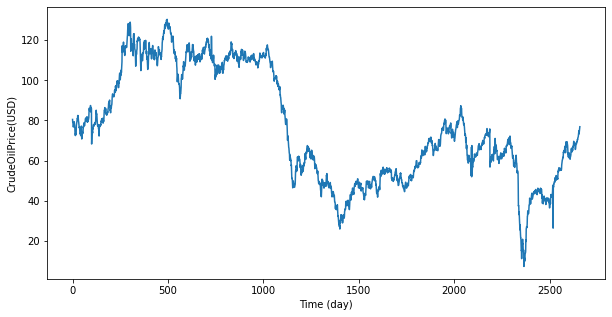

In [ ]:

pyplot.figure(figsize=(10,5))
pyplot.plot(srs.values)
pyplot.xlabel('Time (day)')
pyplot.ylabel('CrudeOilPrice(USD)')
pyplot.show()

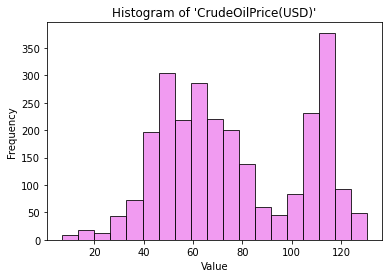

In [ ]:
def plot_histogram(x):
    plt.hist(x, bins = 19, alpha=0.8, color = 'Violet', edgecolor = 'black')
    plt.title("Histogram of '{var_name}'".format(var_name=x.name))
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plot_histogram(srs)

In [ ]:
srs = np.array(srs).reshape((-1, 1))

# Data preparation 
Normalizing the data using minmax scaler

In [ ]:
from sklearn import preprocessing
# normalize features - 

scaler = MinMaxScaler(feature_range=(-1, 1))
scaled = scaler.fit_transform(srs)
srs = pd.DataFrame(scaled)

Fixing the moving window size to be 5. For this purpose we use pandas shift function that shifts the entire column by the number we specify. In the below code snippet, we shifted the column up by 1 (hence used -1. If we want to shift it down by 1, we will have to use +1) and then concatenate that to the original data.


I dropped all the rows that contain the Nan values in the code snippet.

In [ ]:
# Fix the moving window size to be 5
window_size = 5

srs_s = srs.copy()
for i in range(window_size):
    srs = pd.concat([srs, srs_s.shift(-(i+1))], axis = 1)
 # I dropped all the rows that contain the Nan values in the code snippet.   
srs.dropna(axis=0, inplace=True)

The last column in the below table becomes the target y and the first five columns become our input x features. 

In [ ]:
srs.head()

,0,0,0,0,0,0
0,0.189812,0.164504,0.159961,0.158177,0.128488,0.140493
1,0.164504,0.159961,0.158177,0.128488,0.140493,0.165639
2,0.159961,0.158177,0.128488,0.140493,0.165639,0.133842
3,0.158177,0.128488,0.140493,0.165639,0.133842,0.144873
4,0.128488,0.140493,0.165639,0.133842,0.144873,0.170506


In [ ]:
# We can give the columns names, as in, 'a', 'b', 'c', 'd', 'e', for x-columns 1-5 and the sixth column 'y'
srs.columns = ('a', 'b', 'c', 'd', 'e', 'y') 

In [ ]:
srs.head()

,a,b,c,d,e,y
0,0.189812,0.164504,0.159961,0.158177,0.128488,0.140493
1,0.164504,0.159961,0.158177,0.128488,0.140493,0.165639
2,0.159961,0.158177,0.128488,0.140493,0.165639,0.133842
3,0.158177,0.128488,0.140493,0.165639,0.133842,0.144873
4,0.128488,0.140493,0.165639,0.133842,0.144873,0.170506


In [ ]:
srs.shape

(2655, 6)

##Split the dataset into train and test data
We train the model with train data and validate its performance with test data

Split 2660 Dataset into the 0.75 and 0.25 respectively for training set and test set

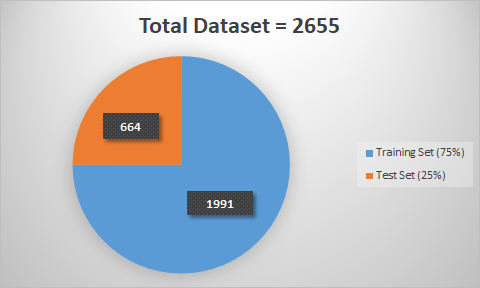

Dimension of train data:  (1991, 6)
Dimension of test data:  (664, 6)


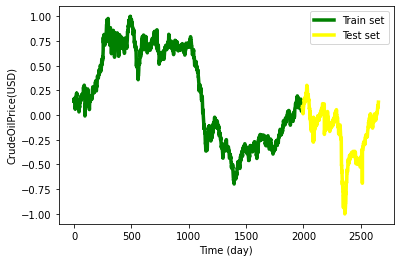

In [ ]:
train_size = int(len(srs)*0.75)
train_dataset, test_dataset = srs.iloc[:train_size], srs.iloc[train_size:]

#Plot train and test data
#plt.figure(figsize = (10, 6))
plt.plot(train_dataset.y, color='green', linewidth=3.5, marker='')
plt.plot(test_dataset.y, color='yellow', linewidth=3.5, marker='')
plt.xlabel('Time (day)')
plt.ylabel('CrudeOilPrice(USD)')
plt.legend(['Train set', 'Test set'], loc='upper right')
#line, = plt.plot(df.values, color='green', linewidth=3.5, marker='')

print('Dimension of train data: ',train_dataset.shape)
print('Dimension of test data: ', test_dataset.shape)

In [ ]:
nrow = round(0.75*srs.shape[0])

In [ ]:
nrow

1991

In [ ]:
train = srs.iloc[:nrow, :]
test = srs.iloc[nrow:,:]

Shuffle the data to make sure that the training/test sets are representative.

In [ ]:
#from sklearn.utils import shuffle
#train = shuffle(train)

In [ ]:
train_X = train.iloc[:,:-1]
train_y = train.iloc[:,-1]
test_X = test.iloc[:,:-1]
test_y = test.iloc[:,-1]

In [ ]:
train_X = train_X.values
train_y = train_y.values
test_X = test_X.values
test_y = test_y.values

In [ ]:
train_X.shape


(1991, 5)

In [ ]:
train_y.shape


(1991,)

In [ ]:
test_X.shape


(664, 5)

In [ ]:
test_y.shape

(664,)

This input data layer must be reformatted into three-dimensional (3D) vectors to match the architecture of the LSTM model. The input vector (3D) comprises of samples, time steps, and features with the shape num_samples, num_timesteps, and num_features, respectively. In this case we have num of time steps = 5 and num_features = 1

we want to identify all the patterns that exist between each of the previous values in the window to predict the current time step!

In [ ]:
train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)
test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [ ]:
train_X.shape


(1991, 5, 1)

In [ ]:
train_y.shape


(1991,)

In [ ]:
test_X.shape


(664, 5, 1)

In [ ]:
test_y.shape

(664,)

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
from keras.wrappers.scikit_learn import KerasRegressor

Below is the model architecture used that is quite self-explanatory—(Its a double stacked GRU layers with the output from the first GRU at each time step is being fed to the second GRU)

In [ ]:
# Define the LSTM model.Using a two layered LSTM architecture with a dense output layer
def create_model(init_type='mse', optimizer='adam'):
  model = Sequential()
  model.add(GRU(256, input_shape = (5,1),  return_sequences = True))
  model.add(Dropout(0.5))
  model.add(GRU(256))
  model.add(Dropout(0.5))
  model.add(Dense(1))
  model.add(Activation("linear"))
  model.compile(loss="mse", optimizer="adam")
  
  return model

In [ ]:
GRU_estimator = KerasRegressor(build_fn= create_model, epochs=100, batch_size=10, verbose=1)

In [ ]:
adab_GRU = AdaBoostRegressor(base_estimator= GRU_estimator)
rescaled_train_X = train_X.reshape(train_X.shape[0],train_X.shape[1],1)

adab_GRU.fit(rescaled_train_X, train_y)


Epoch 1/100
200/200 [==============================] - 8s 23ms/step - loss: 0.0099
Epoch 2/100
200/200 [==============================] - 5s 23ms/step - loss: 0.0042
Epoch 3/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0044
Epoch 4/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0041
Epoch 5/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0043
Epoch 6/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0040
Epoch 7/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0039
Epoch 8/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0040
Epoch 9/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0034
Epoch 10/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0039
Epoch 11/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0036
Epoch 12/100
200/200 [==============================] - 4s 22ms/step - loss: 0.0032
E

AdaBoostRegressor(base_estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x7f0bdff12190>,
                  learning_rate=1.0, loss='linear', n_estimators=50,
                  random_state=None)

In [ ]:
rescaled_test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [ ]:
rescaled_test_X = test_X.reshape(test_X.shape[0],test_X.shape[1],1)

In [ ]:
adab_GRU_preds = adab_GRU.predict(rescaled_test_X)

67/67 [==============================] - 0s 5ms/step


In [ ]:
preds = adab_GRU_preds 

In [ ]:
preds = scaler.inverse_transform([preds])

In [ ]:
preds

array([[74.6480071 , 74.3361352 , 74.43742822, 73.56636156, 72.62901539,
        73.08617866, 71.33506601, 70.92058303, 71.402422  , 71.46954103,
        72.25587904, 73.30552837, 73.84008784, 75.21788961, 75.44309252,
        76.35270572, 77.21312872, 77.6010411 , 77.63979661, 79.01292319,
        77.45906739, 77.80653605, 76.81756516, 78.01439156, 77.85749026,
        79.14318593, 79.485826  , 78.33144568, 78.88571724, 79.3981967 ,
        79.68626272, 79.80717965, 80.14256626, 81.00894119, 82.19390046,
        81.51006239, 82.30561762, 82.07915958, 84.81517596, 85.3697047 ,
        84.51593721, 84.53374156, 84.01343182, 85.72781244, 84.51729477,
        77.49350224, 81.18884375, 81.76630763, 78.22381496, 81.37849904,
        80.193368  , 81.34553931, 80.89444922, 79.21529061, 78.69886249,
        78.28281346, 78.05277599, 78.90459624, 77.84020119, 77.04314695,
        75.73339005, 73.79808448, 73.8520762 , 73.86381656, 73.53067386,
        72.83068475, 70.07627434, 72.67669787, 69.9

In [ ]:
actuals = scaler.inverse_transform([test_y])
#actuals = test_y

#Make prediction using AdaBoostGRU
Here we predict  crude oil price using AdaBoostGRU model. Then, we plot true future(that is, actual) vs prediction in this model.

In [ ]:
# Define a function to calculate Metrics
errors = preds - actuals
mse = np.square(errors).mean()
rmse = np.sqrt(mse)
mae = np.abs(errors).mean()
rmse = np.sqrt(mse)      
mape = np.mean(np.abs(errors)/np.abs(actuals))
wmape = np.sum(np.abs(errors))/np.sum(actuals)
mda = np.mean((np.sign(actuals[1:] - actuals[:-1]) == np.sign(preds[1:] - preds[:-1])).astype(int))

print('Mean Square Error: {:.4f}'.format(mse))
print('Mean Absolute Error: {:.4f}'.format(mae))
print('Root Mean Square Error: {:.4f}'.format(rmse))
print('Weighted Mean Absolute Percentage Error: {:.4f}'.format(wmape))
print('Mean Absolute Percentage Error: {:.4f}'.format(mape))
print('Mean Directional Accuracy: {:.4f}'.format(mda))
print('')


Mean Square Error: 6.0528
Mean Absolute Error: 1.4164
Root Mean Square Error: 2.4602
Weighted Mean Absolute Percentage Error: 0.0247
Mean Absolute Percentage Error: 0.0354
Mean Directional Accuracy: nan



/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [2]:
rmse = 2.4602

In [3]:
mean = 76.3799

In [4]:
si = np.divide(rmse, mean)
print('Scatter Index: {:.4f}'.format(si))
print('')

Scatter Index: 0.0322



In [ ]:
preds = np.ravel(preds)
actuals = np.ravel(actuals)

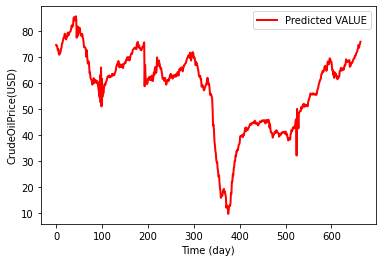

In [ ]:
plt.plot(preds, color = 'red', label = 'Predicted VALUE', linewidth=2, marker='')
plt.legend()

plt.xlabel('Time (day)')
plt.ylabel('CrudeOilPrice(USD)')
pyplot.show()

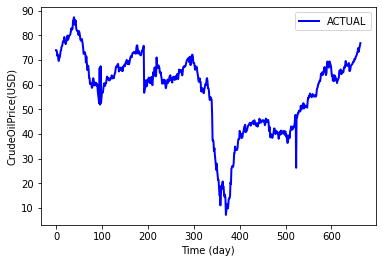

In [ ]:
plt.plot(actuals, color = 'blue', label = 'ACTUAL', linewidth=2, marker='')

plt.legend()

plt.xlabel('Time (day)')
plt.ylabel('CrudeOilPrice(USD)')
pyplot.show()

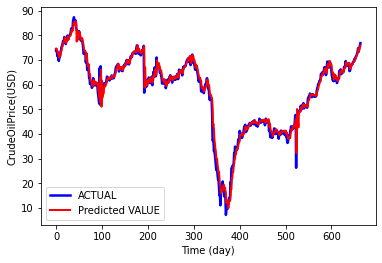

In [ ]:
plt.plot(actuals, color = 'blue', label = 'ACTUAL', linewidth=2.5, marker='')
plt.plot(preds, color = 'red', label = 'Predicted VALUE', linewidth=2, marker='')
plt.legend()

plt.xlabel('Time (day)')
plt.ylabel('CrudeOilPrice(USD)')
pyplot.show()
